In [ ]:
import pandas as pd
import numpy as np
from collections import Counter as c
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import pickle

In [ ]:
data=pd.read_csv("/content/kidney_disease.csv")

In [ ]:
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
data.tail()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd
399,399,58.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,53,6800,6.1,no,no,no,good,no,no,notckd


In [ ]:
data.drop(["id"],axis=1,inplace=True)

In [ ]:
data.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [ ]:
data.columns=['age','blood_pressure','specific_gravity','albumin',
              'sugar','red_blood_cells','pus_cell','pus_cell_clumps','bacteria',
              'blood glucose random','blood_urea','serum_creatinine','sodium','potassium',
              'hemoglobin','packed_cell_volume','white_blood_cell_count','red_blood_cell_count',
              'hypertension','diabetesmellitus','coronary_artery_disease','appetite',
              'pedal_edema','anemia','class']

In [ ]:
data.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood glucose random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'hemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetesmellitus', 'coronary_artery_disease', 'appetite',
       'pedal_edema', 'anemia', 'class'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood glucose random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  hemoglobin               3

In [ ]:
data.isnull().sum()

age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood glucose random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
hemoglobin                  52
packed_cell_volume          70
white_blood_cell_count     105
red_blood_cell_count       130
hypertension                 2
diabetesmellitus             2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
class                        0
dtype: int64

In [ ]:
data.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,blood glucose random,blood_urea,serum_creatinine,sodium,potassium,hemoglobin
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [ ]:
data['class'].unique()


array(['ckd', 'ckd\t', 'notckd'], dtype=object)

In [ ]:
data['class']=data['class'].replace("ckd\t","ckd")
data['class'].unique()

array(['ckd', 'notckd'], dtype=object)

In [ ]:
np.unique(data.dtypes,return_counts=True)

(array([dtype('float64'), dtype('O')], dtype=object), array([11, 14]))

In [ ]:
catcols=set(data.dtypes[data.dtypes=='O'].index.values)
print(catcols)

{'pedal_edema', 'pus_cell', 'coronary_artery_disease', 'pus_cell_clumps', 'white_blood_cell_count', 'hypertension', 'class', 'appetite', 'red_blood_cells', 'red_blood_cell_count', 'anemia', 'diabetesmellitus', 'bacteria', 'packed_cell_volume'}


In [ ]:
for i in catcols:
  print("Columns :",i)
  print(c(data[i]))
  print('*'*120+'\n')

Columns : pedal_edema
Counter({'no': 323, 'yes': 76, nan: 1})
************************************************************************************************************************

Columns : pus_cell
Counter({'normal': 259, 'abnormal': 76, nan: 65})
************************************************************************************************************************

Columns : coronary_artery_disease
Counter({'no': 362, 'yes': 34, '\tno': 2, nan: 2})
************************************************************************************************************************

Columns : pus_cell_clumps
Counter({'notpresent': 354, 'present': 42, nan: 4})
************************************************************************************************************************

Columns : white_blood_cell_count
Counter({nan: 105, '9800': 11, '6700': 10, '9600': 9, '9200': 9, '7200': 9, '6900': 8, '11000': 8, '5800': 8, '7800': 7, '9100': 7, '9400': 7, '7000': 7, '4300': 6, '6300': 6, '10700': 

In [ ]:
catcols.remove('red_blood_cell_count')
catcols.remove('packed_cell_volume')
catcols.remove('white_blood_cell_count')
print(catcols)

{'pedal_edema', 'pus_cell', 'coronary_artery_disease', 'pus_cell_clumps', 'hypertension', 'class', 'appetite', 'red_blood_cells', 'anemia', 'diabetesmellitus', 'bacteria'}


In [ ]:
contcols=set(data.dtypes[data.dtypes!='O'].index.values)
print(contcols)

{'blood_urea', 'serum_creatinine', 'albumin', 'potassium', 'sodium', 'blood glucose random', 'age', 'sugar', 'hemoglobin', 'specific_gravity', 'blood_pressure'}


In [ ]:
for i in contcols:
  print("Continous Columns :",i)
  print(c(data[i]))
  print('*'*120+'\n')

Continous Columns : blood_urea
Counter({46.0: 15, 25.0: 13, 19.0: 11, 40.0: 10, 18.0: 9, 50.0: 9, 15.0: 9, 48.0: 9, 26.0: 8, 27.0: 8, 32.0: 8, 49.0: 8, 36.0: 7, 28.0: 7, 20.0: 7, 17.0: 7, 38.0: 7, 16.0: 7, 30.0: 7, 44.0: 7, 31.0: 6, 45.0: 6, 39.0: 6, 29.0: 6, 24.0: 6, 37.0: 6, 22.0: 6, 23.0: 6, 53.0: 5, 55.0: 5, 33.0: 5, 66.0: 5, 35.0: 5, 42.0: 5, 47.0: 4, 51.0: 4, 34.0: 4, 68.0: 4, 41.0: 4, 60.0: 3, 107.0: 3, 80.0: 3, 96.0: 3, 52.0: 3, 106.0: 3, 125.0: 3, 56.0: 2, 54.0: 2, 72.0: 2, 86.0: 2, 90.0: 2, 87.0: 2, 155.0: 2, 153.0: 2, 77.0: 2, 89.0: 2, 111.0: 2, 73.0: 2, 98.0: 2, 82.0: 2, 132.0: 2, 58.0: 2, 10.0: 2, 162.0: 1, 148.0: 1, 180.0: 1, 163.0: 1, nan: 1, 75.0: 1, 65.0: 1, 103.0: 1, 70.0: 1, 202.0: 1, 114.0: 1, nan: 1, nan: 1, 164.0: 1, 142.0: 1, 391.0: 1, nan: 1, nan: 1, 92.0: 1, 139.0: 1, 85.0: 1, 186.0: 1, 217.0: 1, 88.0: 1, 118.0: 1, 50.1: 1, 71.0: 1, nan: 1, 21.0: 1, 219.0: 1, 166.0: 1, 208.0: 1, 176.0: 1, nan: 1, 145.0: 1, 165.0: 1, 322.0: 1, 235.0: 1, 76.0: 1, nan: 1, nan: 1, 

In [ ]:
contcols.remove('specific_gravity')
contcols.remove('albumin')
contcols.remove('sugar')
print(contcols)

{'blood_urea', 'serum_creatinine', 'potassium', 'sodium', 'blood glucose random', 'age', 'hemoglobin', 'blood_pressure'}


In [ ]:
contcols.add('red_blood_cell_count')
contcols.add('packed_cell_volume')
contcols.add('white_blood_cell_count')
print(contcols)

{'blood_urea', 'serum_creatinine', 'white_blood_cell_count', 'potassium', 'sodium', 'blood glucose random', 'age', 'red_blood_cell_count', 'hemoglobin', 'packed_cell_volume', 'blood_pressure'}


In [ ]:
catcols.add('specific_gravity')
catcols.add('albumin')
catcols.add('sugar')
print(catcols)

{'pedal_edema', 'pus_cell', 'coronary_artery_disease', 'pus_cell_clumps', 'hypertension', 'class', 'albumin', 'appetite', 'red_blood_cells', 'sugar', 'anemia', 'diabetesmellitus', 'bacteria', 'specific_gravity'}


In [ ]:
data['coronary_artery_disease']=data.coronary_artery_disease.replace('\tno','no')
c(data['coronary_artery_disease'])

Counter({'no': 364, 'yes': 34, nan: 2})

In [ ]:
data['diabetesmellitus']=data.diabetesmellitus.replace(to_replace={'\tno':'no','\tyes':'yes','yes':'yes'})
c(data['diabetesmellitus'])

Counter({'yes': 136, 'no': 261, ' yes': 1, nan: 2})

In [ ]:
data.isnull().any()

age                         True
blood_pressure              True
specific_gravity            True
albumin                     True
sugar                       True
red_blood_cells             True
pus_cell                    True
pus_cell_clumps             True
bacteria                    True
blood glucose random        True
blood_urea                  True
serum_creatinine            True
sodium                      True
potassium                   True
hemoglobin                  True
packed_cell_volume          True
white_blood_cell_count      True
red_blood_cell_count        True
hypertension                True
diabetesmellitus            True
coronary_artery_disease     True
appetite                    True
pedal_edema                 True
anemia                      True
class                      False
dtype: bool

In [ ]:
data.isnull().sum()

age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood glucose random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
hemoglobin                  52
packed_cell_volume          70
white_blood_cell_count     105
red_blood_cell_count       130
hypertension                 2
diabetesmellitus             2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
class                        0
dtype: int64

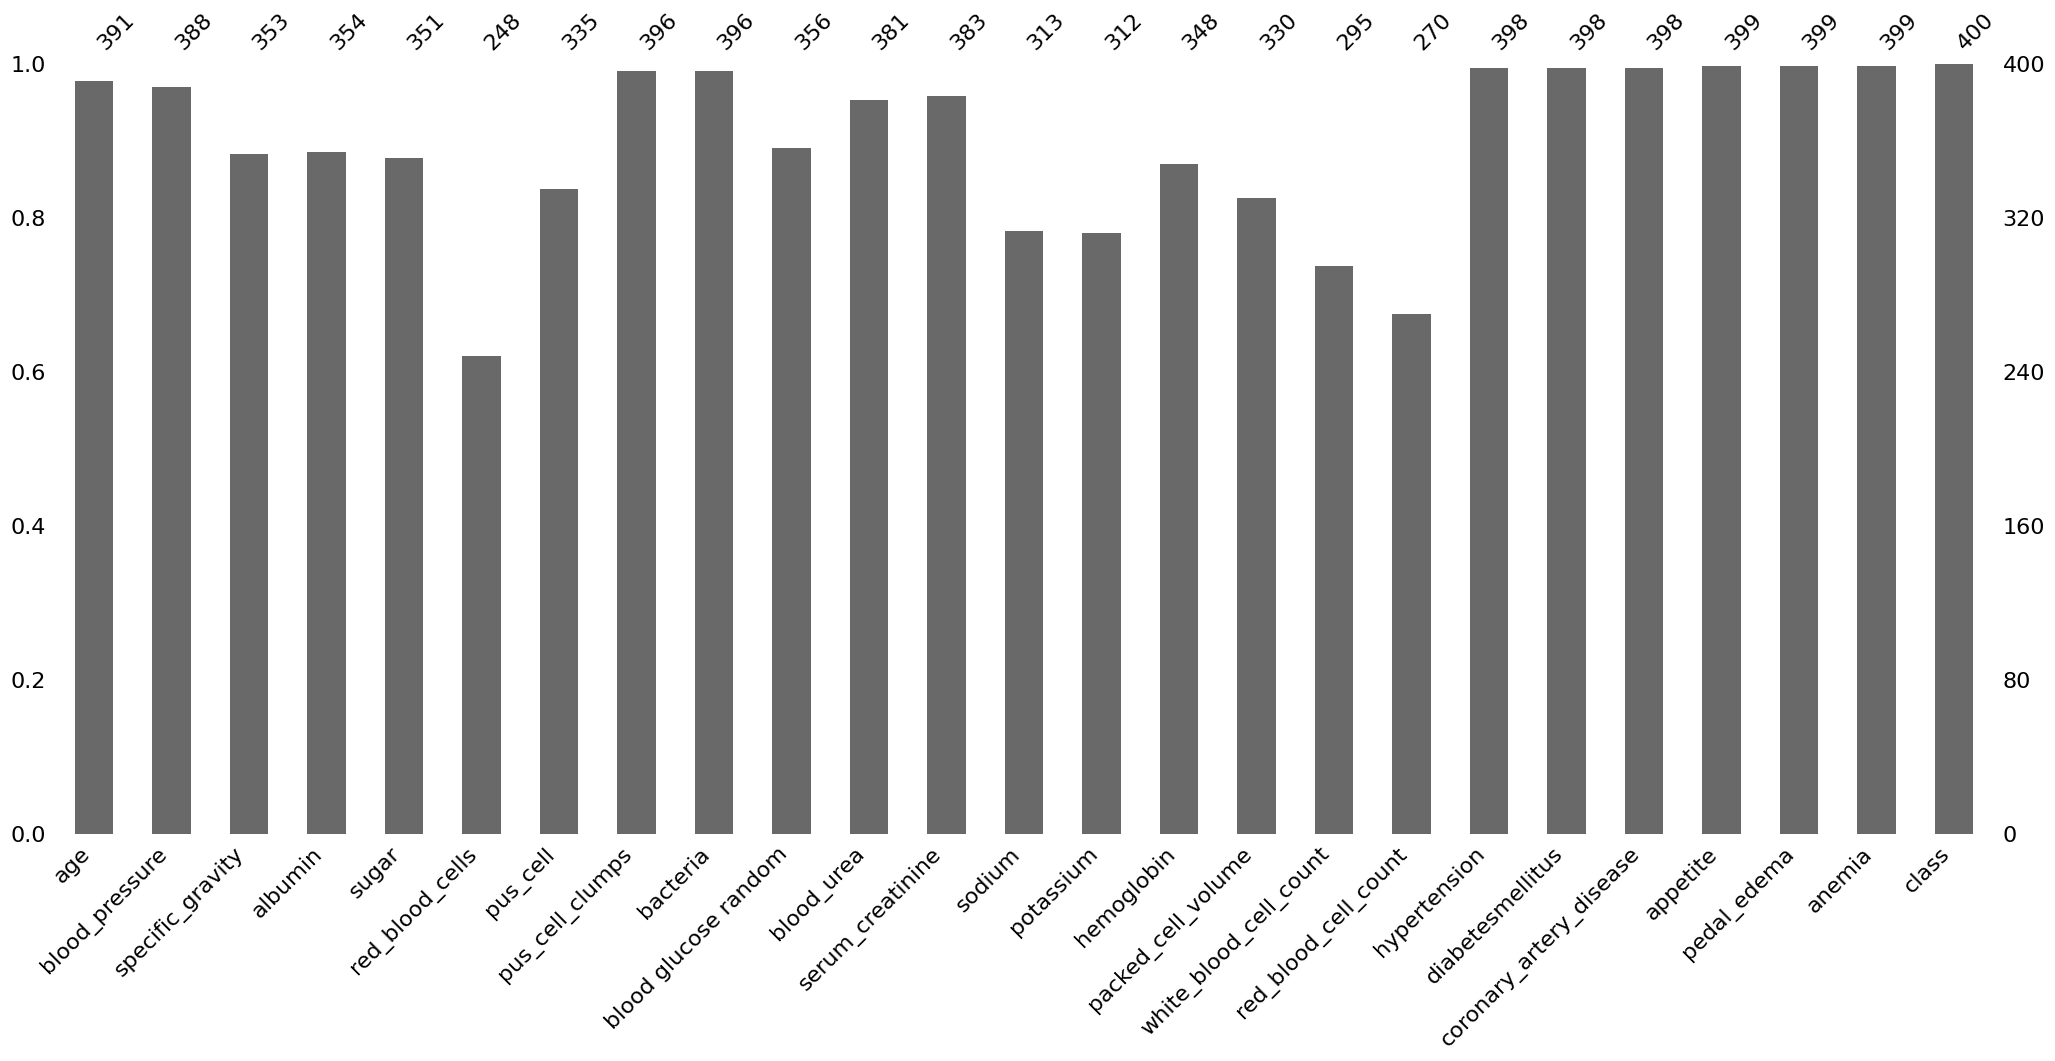

In [ ]:
msno.bar(data)
plt.show()

In [ ]:
data.packed_cell_volume=pd.to_numeric(data.packed_cell_volume, errors='coerce')
data.white_blood_cell_count=pd.to_numeric(data.white_blood_cell_count, errors='coerce')
data.red_blood_cell_count=pd.to_numeric(data.red_blood_cell_count, errors='coerce')

In [ ]:
data['blood glucose random'].fillna(data['blood glucose random'].mean(),inplace=True)
data['blood_pressure'].fillna(data['blood_pressure'].mean(),inplace=True)
data['blood_urea'].fillna(data['blood_urea'].mean(),inplace=True)
data['hemoglobin'].fillna(data['hemoglobin'].mean(),inplace=True)
data['packed_cell_volume'].fillna(data['packed_cell_volume'].mean(),inplace=True)
data['potassium'].fillna(data['potassium'].mean(),inplace=True)
data['red_blood_cell_count'].fillna(data['red_blood_cell_count'].mean(),inplace=True)
data['serum_creatinine'].fillna(data['serum_creatinine'].mean(),inplace=True)
data['sodium'].fillna(data['sodium'].mean(),inplace=True)
data['white_blood_cell_count'].fillna(data['white_blood_cell_count'].mean(),inplace=True)

In [ ]:
data['age'].fillna(data['age'].mode()[0],inplace=True)
data['hypertension'].fillna(data['hypertension'].mode()[0],inplace=True)
data['pus_cell_clumps'].fillna(data['pus_cell_clumps'].mode()[0],inplace=True)
data['appetite'].fillna(data['appetite'].mode()[0],inplace=True)
data['albumin'].fillna(data['albumin'].mode()[0],inplace=True)
data['pus_cell'].fillna(data['pus_cell'].mode()[0],inplace=True)
data['red_blood_cells'].fillna(data['red_blood_cells'].mode()[0],inplace=True)
data['coronary_artery_disease'].fillna(data['coronary_artery_disease'].mode()[0],inplace=True)
data['bacteria'].fillna(data['bacteria'].mode()[0],inplace=True)
data['anemia'].fillna(data['anemia'].mode()[0],inplace=True)
data['sugar'].fillna(data['sugar'].mode()[0],inplace=True)
data['diabetesmellitus'].fillna(data['diabetesmellitus'].mode()[0],inplace=True)
data['pedal_edema'].fillna(data['pedal_edema'].mode()[0],inplace=True)
data['specific_gravity'].fillna(data['specific_gravity'].mode()[0],inplace=True)

In [ ]:
data.isnull().sum()

age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
blood glucose random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
hemoglobin                 0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabetesmellitus           0
coronary_artery_disease    0
appetite                   0
pedal_edema                0
anemia                     0
class                      0
dtype: int64

In [ ]:
catcols=['anemia', 'pedal_edema','appetite','bacteria','class','coronary_artery_disease','diabetesmellitus',
         'hypertension','pus_cell','pus_cell_clumps','red_blood_cells']

In [ ]:
from sklearn.preprocessing import LabelEncoder
for i in catcols:
  print("LABEL ENCODING OF:",i)
  LEi = LabelEncoder()
  print(c(data[i]))
  data[i] = LEi.fit_transform(data[i])
  print(c(data[i]))
  print("*"*100)

LABEL ENCODING OF: anemia
Counter({'no': 340, 'yes': 60})
Counter({0: 340, 1: 60})
****************************************************************************************************
LABEL ENCODING OF: pedal_edema
Counter({'no': 324, 'yes': 76})
Counter({0: 324, 1: 76})
****************************************************************************************************
LABEL ENCODING OF: appetite
Counter({'good': 318, 'poor': 82})
Counter({0: 318, 1: 82})
****************************************************************************************************
LABEL ENCODING OF: bacteria
Counter({'notpresent': 378, 'present': 22})
Counter({0: 378, 1: 22})
****************************************************************************************************
LABEL ENCODING OF: class
Counter({'ckd': 250, 'notckd': 150})
Counter({0: 250, 1: 150})
****************************************************************************************************
LABEL ENCODING OF: coronary_artery_disease
Counter(

Text(0.5, 1.0, 'age vs blood Scatter Plot')

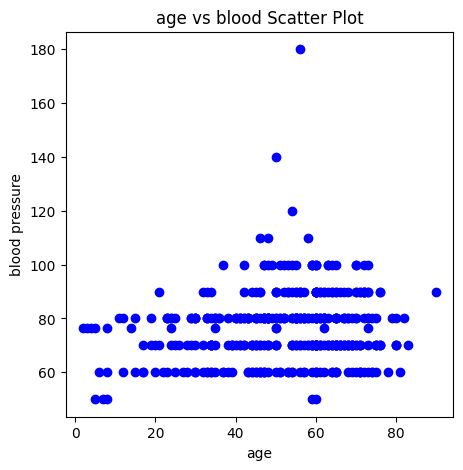

In [ ]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(5,5))
plt.scatter(data['age'],data['blood_pressure'],color='blue')
plt.xlabel('age')
plt.ylabel('blood pressure')
plt.title("age vs blood Scatter Plot")

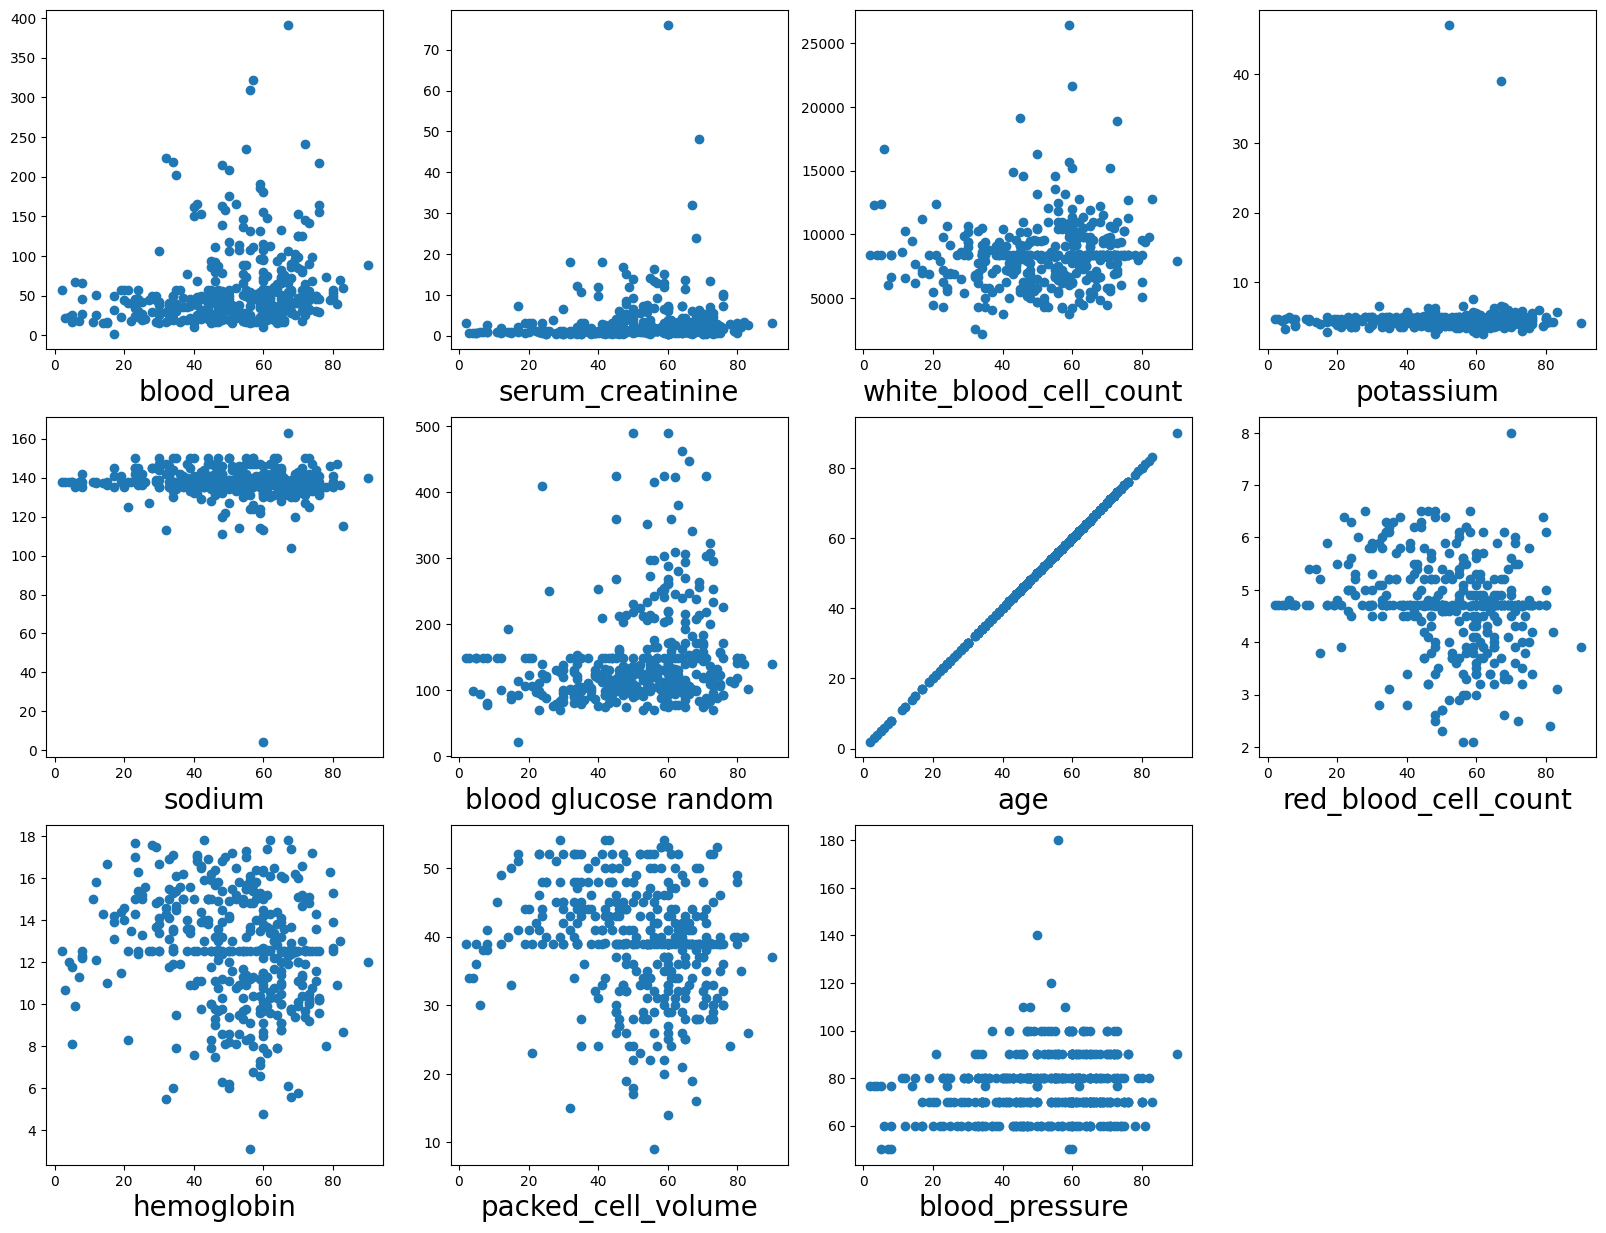

In [ ]:
plt.figure(figsize=(20,15), facecolor='white')
plotnumber = 1

for column in contcols:
  if plotnumber<=11:
    ax = plt.subplot(3,4,plotnumber)
    plt.scatter(data['age'],data[column])
    plt.xlabel(column,fontsize=20)

  plotnumber+=1
plt.show() 

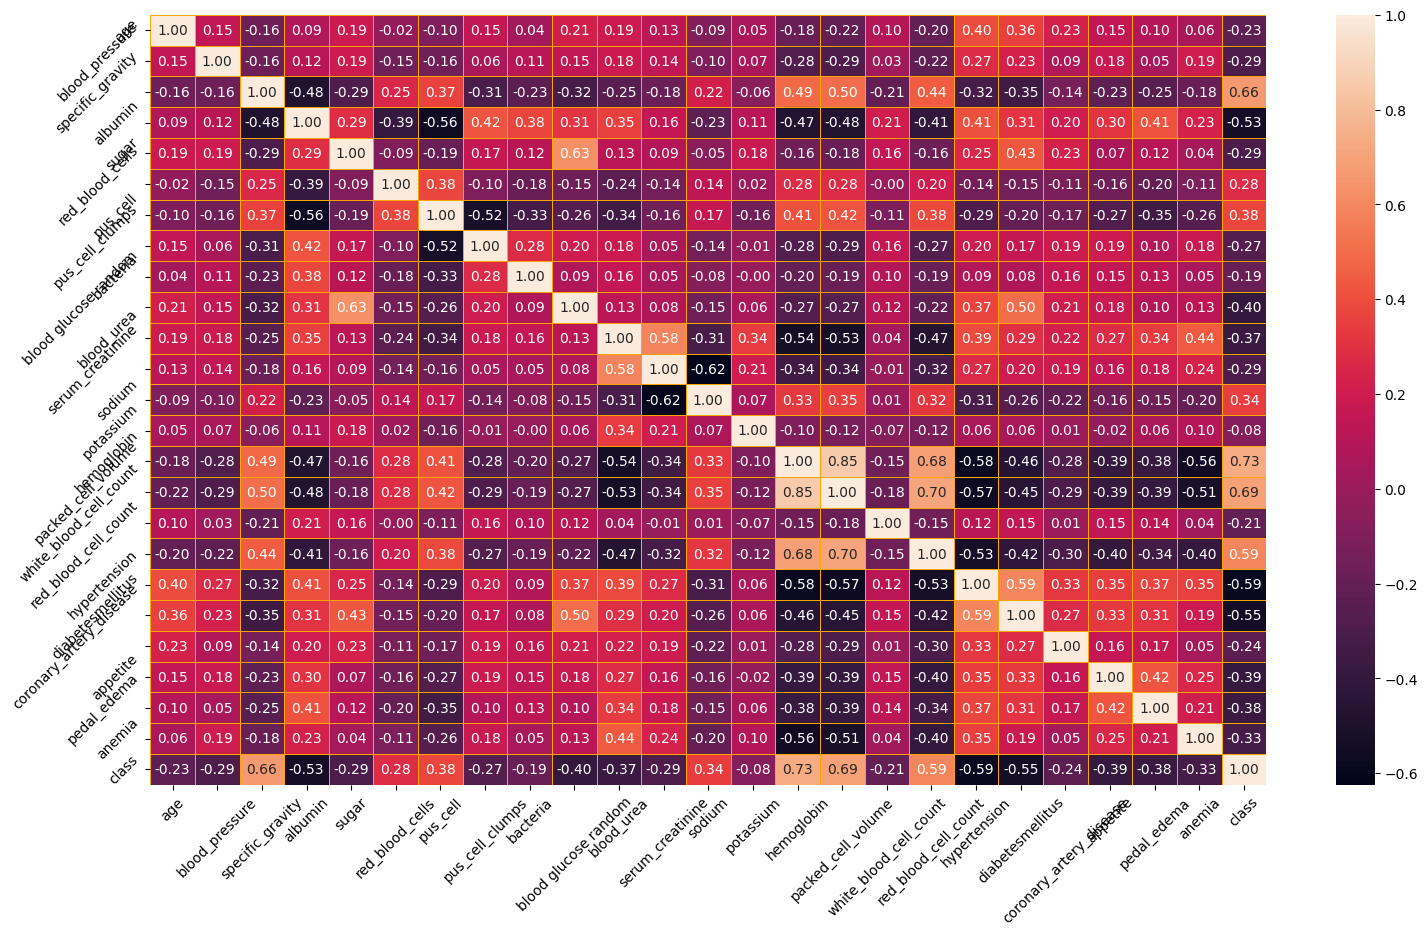

In [ ]:
f,ax=plt.subplots(figsize=(18,10))
sns.heatmap(data.corr(),annot=True,fmt=".2f",ax=ax,linewidths=0.5,linecolor="orange")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [ ]:
data['class'].unique()

array([0, 1])

<Axes: ylabel='count'>

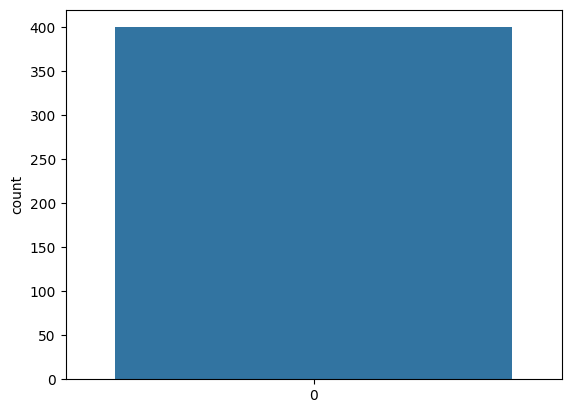

In [ ]:
sns.countplot(data['class'])

In [ ]:
selcols=['red_blood_cells','pus_cell','blood glucose random','blood_urea',
         'pedal_edema','anemia','diabetesmellitus','coronary_artery_disease']
x=pd.DataFrame(data,columns=selcols)
y=pd.DataFrame(data,columns=['class'])
print(x.shape)
print(y.shape)   

(400, 8)
(400, 1)


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(280, 8)
(120, 8)
(280, 1)
(120, 1)


In [ ]:
lgr = LogisticRegression()
lgr.fit(x_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
y_pred =lgr.predict([[129,99,1,0,0,1,0,1]])

print(y_pred)
c(y_pred)

[1]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Counter({1: 1})

In [ ]:
y_pred = lgr.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.9

In [ ]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[68, 10],
       [ 2, 40]])

In [ ]:
pickle.dump(lgr,open('CKD.pkl','wb'))